# Telco Customer Churn Prediction

- __Objective__: Predict whether a customer will churn using Logistic Regression
- **Dataset**: IBM Telco Customer Churn (7043 records)
- **Model Accuracy**: ~80-82%
- **Key Insight**: Month-to-month contracts and fiber optic users are high-risk

## Import Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [167]:
# To supress the FutureWarning globally. For clean output
pd.set_option('future.no_silent_downcasting', True)

## Load and Explore Data

In [105]:
# Load dataset
df = pd.read_csv('Telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning ad PreProcessing

In [107]:
# Data Cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [109]:
df = df.drop('customerID', axis=1)

## Encode binary columns (Yes/NO -> 1/0)

In [172]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [113]:
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})
    

In [115]:
df = pd.get_dummies(df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [117]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [119]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-Test Split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Model Training

In [125]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


## Predictions and Evaluations

In [129]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [131]:
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 80.77%

Confusion Matrix:
[[926 109]
 [162 212]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



## Feature Importance

In [135]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values(by='Abs_Coefficient', ascending=False)

In [137]:
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
                        Feature  Coefficient  Abs_Coefficient
3                        tenure    -1.222044         1.222044
13               MonthlyCharges    -0.843086         0.843086
16  InternetService_Fiber optic     0.747611         0.747611
17           InternetService_No    -0.621807         0.621807
19            Contract_Two year    -0.588603         0.588603
14                 TotalCharges     0.495565         0.495565
18            Contract_One year    -0.286070         0.286070
11              StreamingMovies     0.245955         0.245955
10                  StreamingTV     0.245126         0.245126
5                 MultipleLines     0.210467         0.210467


## Visualizations

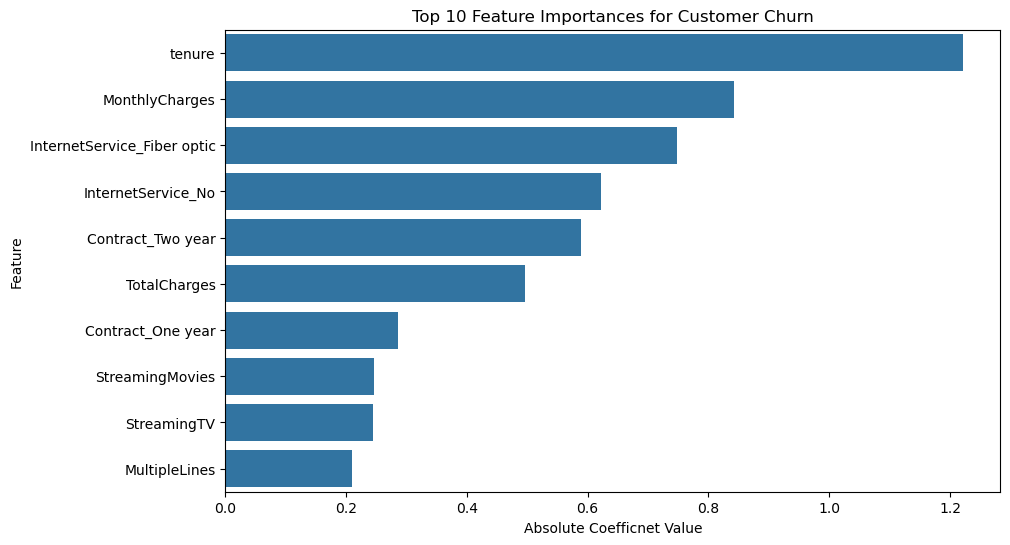

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Feature Importances for Customer Churn')
plt.xlabel('Absolute Coefficnet Value')
plt.show()

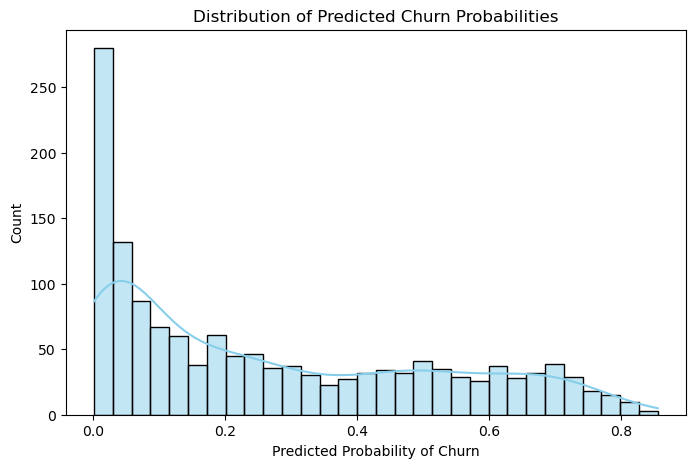

In [147]:
plt.figure(figsize=(8,5))
sns.histplot(y_pred_proba, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Predicted Churn Probabilities')
plt.xlabel('Predicted Probability of Churn')
plt.show()

## Conclusion & Business Insights

### Model Performance
- **Algorithm**: Logistic Regression
- **Accuracy**: ~80-82% on test set
- The model is strong at identifying customers likely to stay and reasonably good at flagging potential churners.

### The most influential factors driving customer churn are:
- **Tenure**: Longer customer relationships significantly reduce churn risk.
- **MonthlyCharges**: Higher monthly bills increase churn likelihood.
- **InternetService_Fiber optic**: Fiber optic customers show higher churn (possibly due to competition or service expectations)
- **Contract Type**:
    - Two-year and one-year contracts dramatically lower churn
    - Month-to-month customers are at higher risk
- Customers without internet service tend to stay longer
- Streaming add-ons (TV/Movies) and mutiple lines slightly improve retention

### Predicted Churn Probability Distribution
- Majority of customers have low churn risk (<20% probability)
- A meaningful subset falls in the medium-high risk zone (40-80%)
- These medium-high risk customers are ideal targets for proactive retention campaigns 